# Lec 6.2

- Go over #3 from Monday (6.1)
- Do #4 as an exercise

- Finding indices of interest with np.where

- Meshgrids

3 . Mask out regions outside of the tropics (google definition of tropics) and plot the annual mean again. Adjust the font size of your axes labels and title. Adjust the axis limits to be constrained to the data (i.e. no whitespace).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

In [3]:
data = xr.open_dataset('C:\\Users\\srv_veralab\\Downloads\\CESM.003.SST.1980.nc')

# extract variables from the above netcdf file
lat = np.array(data.lat)
#lat
lon = np.array(data.lon)
# monthly sea surface temperature
sst = np.array(data.SST)

In [4]:
sst_mean = np.mean(sst, axis = 0)

In [5]:
lat.shape

#this is a one dimensional array - We want it to mask a 2d array

(180,)

In [6]:
lat

array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
       -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
       -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
       -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
       -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
       -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
       -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
       -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
       -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
        -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,

In [17]:
# make a mask using the lat array

trop = 23.4368

(lat> trop) | (lat< (-1*trop))

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [18]:
trop.type

AttributeError: 'float' object has no attribute 'type'

In [8]:
# the easiest way to do this is to make a mask array that is the same size as the mean sst array
mask = np.zeros_like(sst_mean)
mask.shape

#this is a 2d array

(180, 360)

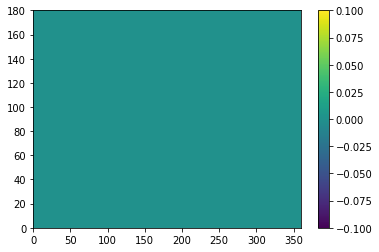

In [9]:
plt.pcolormesh(mask)
plt.colorbar()

In [11]:
# we want every longitude, all 360, to have the same mask we just created
#For every collumn of the 360 columns that make up the long of the earth....

for i in range(360):
    mask[:,i] = (lat> trop) | (lat< (-1*trop))
    
#: in mask is for the 180 part
#-1*trop is to mask southern hem.
#you need to do this with an OR because there is no areas in the north and south that overlap we want to include both.

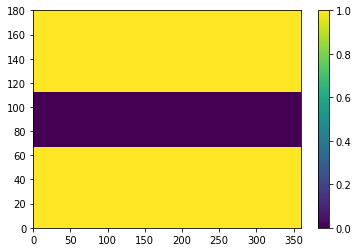

In [12]:
plt.pcolormesh(mask)
plt.colorbar()

In [13]:
# take the mean SST and mask
sst_trop = np.ma.masked_where(mask,sst_mean)


(-23.4368, 24.4368)

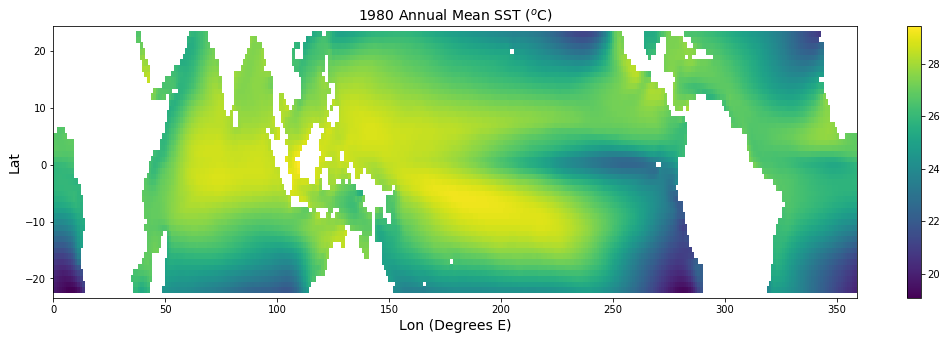

In [14]:
plt.figure(figsize=(18,5))
plt.pcolormesh(lon,lat,sst_trop)
plt.xlabel('Lon (Degrees E)', fontsize = 14)
plt.ylabel('Lat', fontsize = 14)
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)', fontsize = 14) #$$ pputs it into law tec mode and allows us to do a superscript

plt.ylim([-trop,trop+1])


In [15]:
# if I want to change all of my plots:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
# note this method changes tick mark font sizes as well

(-23.4368, 24.4368)

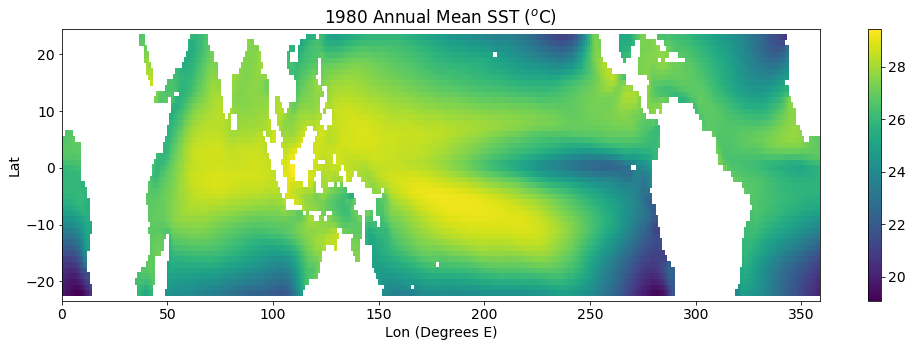

In [16]:
# now I don't have to put in all of the fontsize commands
plt.figure(figsize=(17,5))
plt.pcolormesh(lon,lat,sst_trop)
plt.xlabel('Lon (Degrees E)')
plt.ylabel('Lat')
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)')
plt.ylim([-trop,trop+1])

Exercise (#4 from last time): Mask out the tropics and plot again.

(-23.4368, 24.4368)

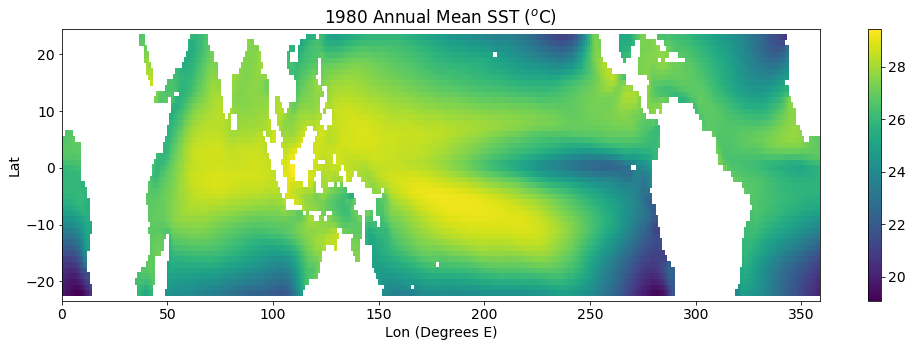

In [50]:
plt.figure(figsize=(17,5))
plt.pcolormesh(lon,lat,sst_trop) #Need to make a new variable that masks sst_trop
plt.xlabel('Lon (Degrees E)')
plt.ylabel('Lat')
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)')
plt.ylim([-trop,trop+1])

In [ ]:
# take the mean SST and mask
sst_trop = np.ma.masked_where(mask,sst_mean)

#I need a new variable for mask

In [52]:
mask = np.zeros_like(sst_mean)

# make a mask using the lat array

trop = 23.4368

(lat< trop) & (lat> (-1*trop))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [53]:

for i in range(360):
    mask[:,i] = (lat< trop) & (lat> (-1*trop))
    

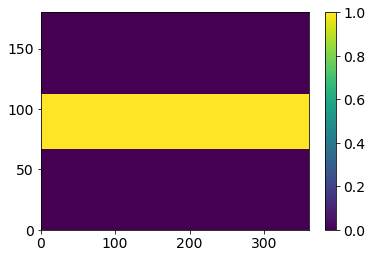

In [54]:
plt.pcolormesh(mask)
plt.colorbar()

In [55]:
sst_trop = np.ma.masked_where(mask,sst_mean)


Text(0.5, 1.0, '1980 Annual Mean SST ($^o$C)')

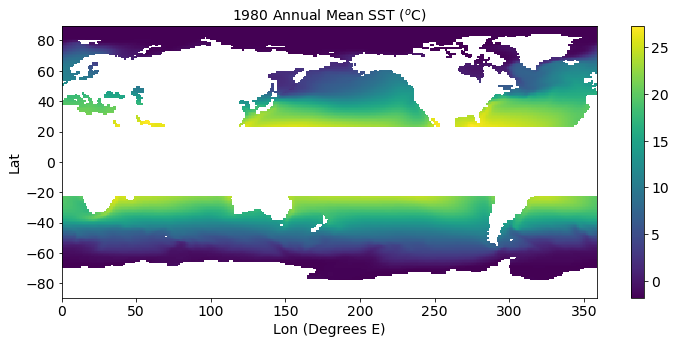

In [76]:
plt.figure(figsize=(12,5))
plt.pcolormesh(lon,lat,sst_trop)
plt.xlabel('Lon (Degrees E)', fontsize = 14)
plt.ylabel('Lat', fontsize = 14)
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)', fontsize = 14) #$$ pputs it into law tec mode and allows us to do a superscript

#plt.ylim([-trop,trop+1])


## Part 2: Finding data

From #5: Find the grid cell closest to us. Plot the seasonal cycle of SST. 

The latitude of South Padre Island is 26.1118° N, 97.1681° W

In [19]:
lat

array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
       -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
       -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
       -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
       -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
       -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
       -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
       -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
       -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
        -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,

In [20]:
# use np.where to find elements that are greater than a given value
np.where(lat>26.1118)
# these are all the elements that are greater than 26

(array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
       dtype=int64),)

In [21]:
lat[116] # yes this is gerater than 26.1118

26.5

### aside: finding values in a 2D array

In [22]:
# if we had a 2D array it would give us two arrays, one for each dimension
np.where(sst_mean > 20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


(array([ 53,  53,  53, ..., 130, 130, 130], dtype=int64),
 array([ 21,  22,  23, ..., 296, 297, 298], dtype=int64))

In [23]:
# we can assign arrays to these indices where the constraint is true
#where is the temp greater than 20 C?
xind, yind = np.where(sst_mean > 20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [30]:
xind
#53 is the index of the longitude
#there are 3 53s since there are vaues of lon that have multiple values of lat that have over 20C

array([ 53,  53,  53, ..., 130, 130, 130], dtype=int64)

In [31]:
lon[53]

53.0

In [32]:
lat[21]

-68.5

In [33]:
yind

array([ 21,  22,  23, ..., 296, 297, 298], dtype=int64)

In [34]:
sst_mean[53,21] # yes this is greater than 20

20.000555

### back to the main problem

In [35]:
# where is better at nD arrays rather than 1D arrays, where it gives weirdly formatted output
np.where(lat>26.1118)

(array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
       dtype=int64),)

In [36]:
xind= np.where(lat>26.1118)

In [37]:
# what kind of thing is xind?
xind?

In [38]:
xind[0]
# now we have an array

array([116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
      dtype=int64)

In [40]:
xind[0][0]

116

In [41]:
lat[xind[0][0]]
#This is the first element of the first element of the tuble

26.5

In [42]:
# note lon is 0 to 360 East
# we want  97.1681° W = 360 - 97.1681 E
mylon = 360 - 97.1681
mylon

262.8319

In [43]:
# same thing for lon
np.where(lon > 262.8319)[0][0]

263

In [44]:
sst_mean.shape
# remember this is lat by lon

(180, 360)

In [46]:
sst_mean[116,263]
# what is wrong here?

#Not a Number because it is on land
#We are analyzing Sea Surface temp

nan

(20, 40)

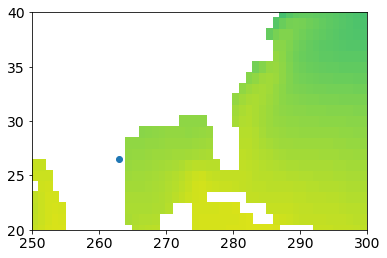

In [47]:
# let's try some investigative plotting
plt.pcolormesh(lon,lat,sst_mean)
plt.scatter(lon[263],lat[116])
plt.xlim(250,300)
plt.ylim(20,40)
#yeah, that's on land

(20, 40)

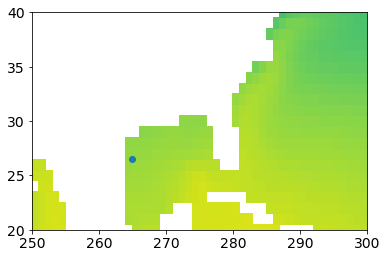

In [49]:
# let's try some investigative plotting
plt.pcolormesh(lon,lat,sst_mean)
plt.scatter(lon[265],lat[116])
plt.xlim(250,300)
plt.ylim(20,40)
#Now its in the gulf of mexico!

In [48]:
sst_mean[116,264]
# move over one to offshore

24.422651

Exercise: Make a line plot of the montly temperature at this location

1. Which month is it hottest? How hot is it?
2. Which is it coldest? How cold is it?
3. Now use max and min functions with np.where to find the above values

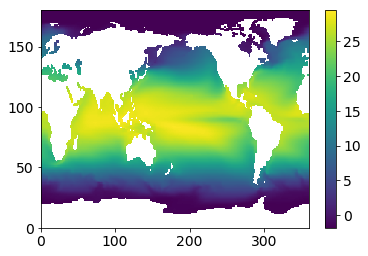

In [78]:
#Location : 26.1118° N, 97.1681° W
#Monthly Sea Surface Temperature: SST? 
plt.pcolormesh(sst_mean)
plt.colorbar()

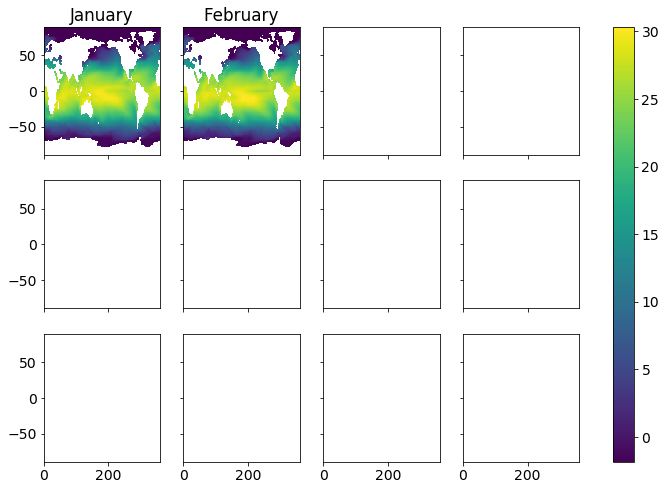

In [80]:
fig, ax = plt.subplots(figsize=(12,8), nrows=3, ncols=4, sharex=True, sharey= True)

im= ax[0,0].pcolormesh(lon,lat,sst[0,:,:],label='January')
ax[0,0].set_title('January')
im= ax[0,1].pcolormesh(lon,lat,sst[1,:,:],label='February')
ax[0,1].set_title('February')
im= ax[0,1].pcolormesh(lon,lat,sst[1,:,:],label='February')
ax[0,1].set_title('February')

fig.colorbar(im, ax=ax)

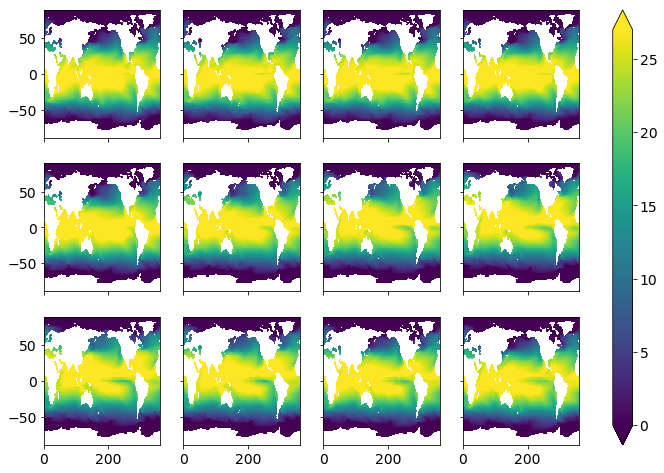

In [81]:
#There was a faster way to do this using for loops

fig, myax = plt.subplots(figsize=(12,8), nrows=3, ncols=4, sharex=True,
                       sharey=True)
# add titles here
#titles = ['Jan', 'Feb']...
cmax = 27
cmin = 0
# initialize the counter for the month
n = 0
for i in range(0,3):
    for j in range(0,4):
        im = myax[i,j].pcolormesh(lon, lat, sst[n,:,:], vmin = cmin, vmax = cmax)
        n +=1 #increment the month

fig.colorbar(im, ax = myax, extend = 'both')

## Part 3: Meshes

See https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html

Suppose we want to plot a 2D function. When we wanted to plot a 1D function we used an np.arange or np.linspace

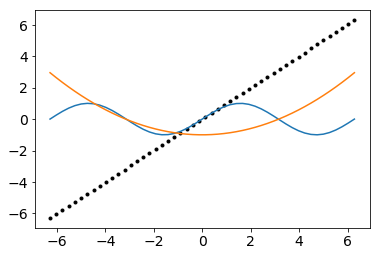

In [58]:
#This is our basis array 
x = np.linspace(-np.pi*2, np.pi*2, 50) # the x values to evaluate a function at
#We can use this basis array to plug into a function
# we can use the x values above to evaluate any function
#For the linspce we go from -np.pi*2 to np.pi*2 and have 50 points in between
y1 = np.sin(x)
y2 = 0.1* x**2 -1

plt.plot(x,x, '.k') #. is to have a dotted line , k is to make it black
plt.plot(x,y1)
plt.plot(x,y2)

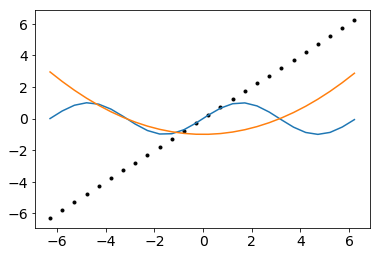

In [60]:
# similarly
#x = np.linspace(-np.pi*2, np.pi*2, 100) # the x values to evaluate a function at
x = np.arange(-np.pi*2, np.pi*2, .5) # the x values to evaluate a function at
#in the arange the 0.5 is the increment

# we can use the x values above to evaluate any function
y1 = np.sin(x)
y2 = 0.1* x**2 -1

plt.plot(x,x,'k.')
plt.plot(x,y1)
plt.plot(x,y2)

Exercise: In words, what is different about the arange and linspace x arrays? 

Now we want to plot a 2D function, so we need a point x and a point y to evaluate for every location on the 2D grid. 

In [61]:
x = np.linspace(-np.pi*2, np.pi*2, 50)
y = np.linspace(-1,1,50)
X,Y = np.meshgrid(x,y)

Exercise: what are X and Y? Plot them

In [62]:
x.shape

(50,)

In [63]:
X.shape

(50, 50)

In [66]:
(X)

array([[-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       ...,
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531],
       [-6.28318531, -6.02672876, -5.77027222, ...,  5.77027222,
         6.02672876,  6.28318531]])

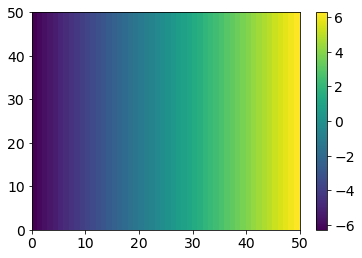

In [67]:
plt.pcolormesh(X)
plt.colorbar()

ValueError: not enough values to unpack (expected 2, got 1)

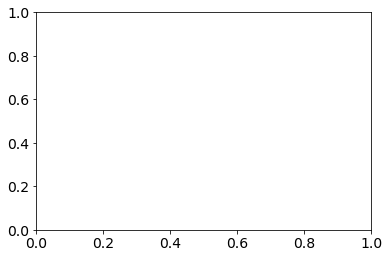

In [70]:
plt.pcolormesh(x)
plt.colorbar()

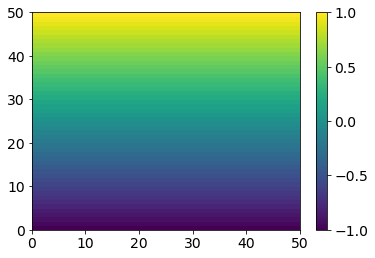

In [68]:
plt.pcolormesh(Y)
plt.colorbar()

TypeError: Illegal arguments to pcolormesh; see help(pcolormesh)

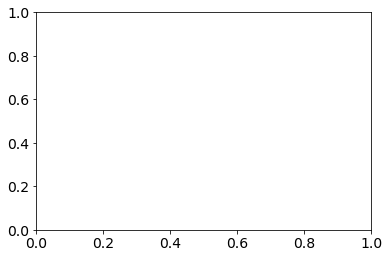

In [69]:
plt.pcolormesh(X,Y)
plt.colorbar()

We can use X and Y to evaluate a function

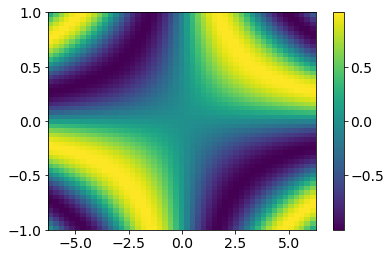

In [71]:
z = np.sin(X*Y)
plt.pcolormesh(x,y,z) #Because we put the x and y values in here, we changed the axis numbers
plt.colorbar()

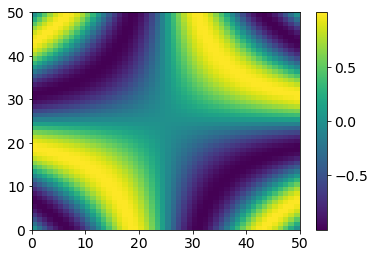

In [73]:
plt.pcolormesh(z)
plt.colorbar()
#0-50 is the index! 

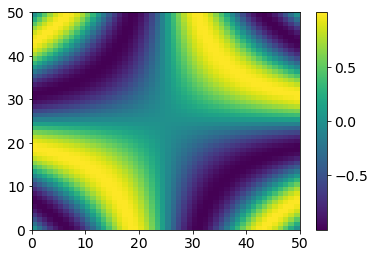

In [74]:
z = np.sin(X*Y)
plt.pcolormesh(z) 
plt.colorbar()

In [72]:
z.shape

(50, 50)

Note that in the above, x and y were used to plot z. We can also use X and Y

In [ ]:
z = np.sin(X*Y)
plt.pcolormesh(X,Y,z) 
plt.colorbar()

Exercise: Could we use x and y to define z above? Why or why not?

Exercise: Do exercises 3 and 4 above using meshgrids instead of for loops